# original BA

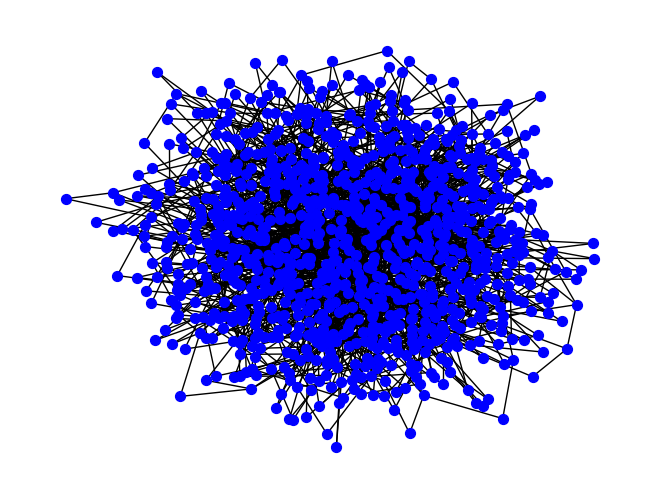

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def barabasi_albert_graph(n, m, m0):
    """
    Generate a Barabasi-Albert (BA) scale-free network.
    
    Parameters:
    n: Total number of nodes in the final network
    m: Number of edges to attach from a new node to existing nodes
    m0: Initial number of nodes
    
    Returns:
    G: A Barabasi-Albert scale-free network
    """
    # Initialize the graph with m0 nodes
    G = nx.complete_graph(m0)
    
    # List of nodes with degree (initially each node in the complete graph has degree m0-1)
    targets = list(G.nodes())
    repeated_nodes = targets.copy()
    
    for new_node in range(m0, n):
        # Select m unique nodes from repeated_nodes with probability proportional to their degree
        targets = np.random.choice(repeated_nodes, size=m, replace=False)
        
        # Add the new node and create edges
        G.add_node(new_node)
        G.add_edges_from((new_node, target) for target in targets)
        
        # Add new node to the list of repeated nodes
        repeated_nodes.extend(targets)
        repeated_nodes.extend([new_node] * m)
    
    return G

# Example usage
n = 1000  # Total number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
m0 = 5   # Initial number of nodes

G = barabasi_albert_graph(n, m, m0)
nx.draw(G, node_size=50, node_color='blue', with_labels=False)
plt.show()

# modified BA


In [15]:
def modified_barabasi_albert_graph(n, m, m0):
    """
    Generate a modified Barabasi-Albert (BA) scale-free network with bias proportional to the square of the degree.
    
    Parameters:
    n: Total number of nodes in the final network
    m: Number of edges to attach from a new node to existing nodes
    m0: Initial number of nodes
    
    Returns:
    G: A modified Barabasi-Albert scale-free network
    """
    # Initialize the graph with m0 nodes
    G = nx.complete_graph(m0)
    
    # List of nodes with degree (initially each node in the complete graph has degree m0-1)
    targets = list(G.nodes())
    repeated_nodes = targets.copy()
    
    for new_node in range(m0, n):
        # Calculate the probability proportional to the square of the degree
        degrees = np.array([G.degree(node) for node in repeated_nodes])
        probabilities = degrees**2 / np.sum(degrees**2)
        
        # Select m unique nodes based on the modified probability
        targets = np.random.choice(repeated_nodes, size=m, replace=False, p=probabilities)
        
        # Add the new node and create edges
        G.add_node(new_node)
        G.add_edges_from((new_node, target) for target in targets)
        
        # Add new node to the list of repeated nodes
        repeated_nodes.extend(targets)
        repeated_nodes.extend([new_node] * m)
    
    return G

# Generate multiple instances of the original and modified BA networks and compute metrics
num_instances = 100
n = 1000  # Total number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
m0 = 5   # Initial number of nodes

clustering_coeffs_original = []
path_lengths_original = []
degree_distributions_original = []

clustering_coeffs_modified = []
path_lengths_modified = []
degree_distributions_modified = []

for _ in range(num_instances):
    # Original BA network
    G_original = barabasi_albert_graph(n, m, m0)
    clustering_coeff_original = nx.average_clustering(G_original)
    clustering_coeffs_original.append(clustering_coeff_original)
    if nx.is_connected(G_original):
        path_length_original = nx.average_shortest_path_length(G_original)
    else:
        path_length_original = float('inf')
    path_lengths_original.append(path_length_original)
    degree_distribution_original = [d for n, d in G_original.degree()]
    degree_distributions_original.extend(degree_distribution_original)
    
    # Modified BA network
    G_modified = modified_barabasi_albert_graph(n, m, m0)
    clustering_coeff_modified = nx.average_clustering(G_modified)
    clustering_coeffs_modified.append(clustering_coeff_modified)
    if nx.is_connected(G_modified):
        path_length_modified = nx.average_shortest_path_length(G_modified)
    else:
        path_length_modified = float('inf')
    path_lengths_modified.append(path_length_modified)
    degree_distribution_modified = [d for n, d in G_modified.degree()]
    degree_distributions_modified.extend(degree_distribution_modified)

# Average metrics
avg_clustering_coeff_original = np.mean(clustering_coeffs_original)
avg_path_length_original = np.mean([pl for pl in path_lengths_original if pl != float('inf')])

avg_clustering_coeff_modified = np.mean(clustering_coeffs_modified)
avg_path_length_modified = np.mean([pl for pl in path_lengths_modified if pl != float('inf')])

print(f"Original BA - Average Clustering Coefficient: {avg_clustering_coeff_original}")
print(f"Original BA - Average Characteristic Path Length: {avg_path_length_original}")
print(f"Modified BA - Average Clustering Coefficient: {avg_clustering_coeff_modified}")
print(f"Modified BA - Average Characteristic Path Length: {avg_path_length_modified}")

Original BA - Average Clustering Coefficient: 0.025538556684324205
Original BA - Average Characteristic Path Length: 4.109679419419419
Modified BA - Average Clustering Coefficient: 0.029050059866971577
Modified BA - Average Characteristic Path Length: 2.0053355755755753


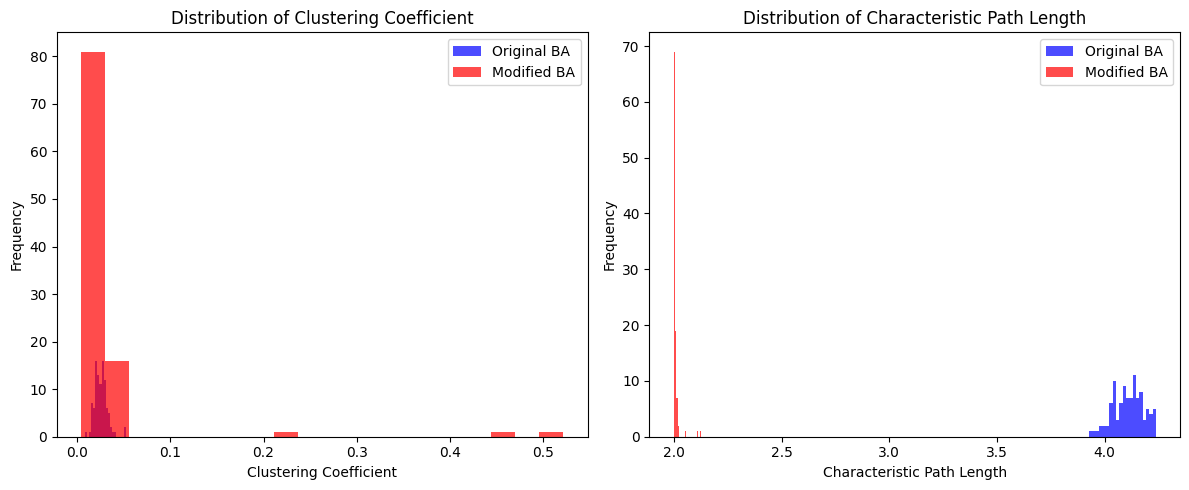

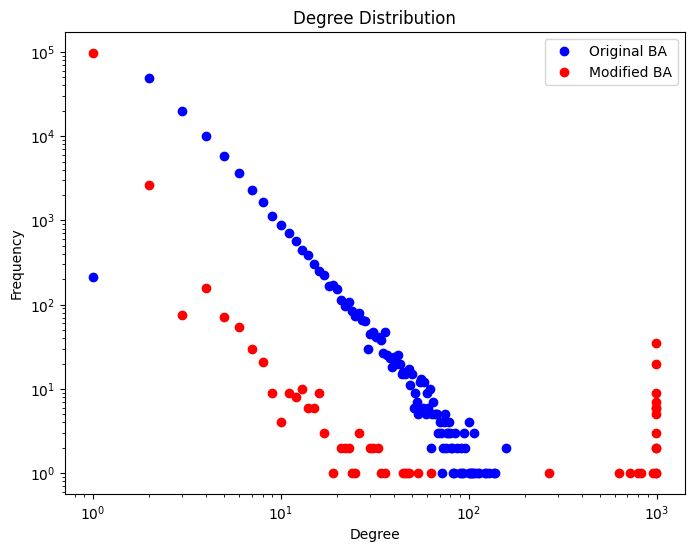

In [16]:
# Plot average clustering coefficient and characteristic path length
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(clustering_coeffs_original, bins=20, color='blue', alpha=0.7, label='Original BA')
plt.hist(clustering_coeffs_modified, bins=20, color='red', alpha=0.7, label='Modified BA')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Clustering Coefficient')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([pl for pl in path_lengths_original if pl != float('inf')], bins=20, color='blue', alpha=0.7, label='Original BA')
plt.hist([pl for pl in path_lengths_modified if pl != float('inf')], bins=20, color='red', alpha=0.7, label='Modified BA')
plt.xlabel('Characteristic Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Characteristic Path Length')
plt.legend()

plt.tight_layout()
plt.show()

# Plot degree distribution
plt.figure(figsize=(8, 6))
from collections import Counter

degree_counts_original = Counter(degree_distributions_original)
degree_counts_modified = Counter(degree_distributions_modified)

degrees_original = np.array(list(degree_counts_original.keys()))
frequencies_original = np.array(list(degree_counts_original.values()))

degrees_modified = np.array(list(degree_counts_modified.keys()))
frequencies_modified = np.array(list(degree_counts_modified.values()))

plt.loglog(degrees_original, frequencies_original, 'bo', label='Original BA')
plt.loglog(degrees_modified, frequencies_modified, 'ro', label='Modified BA')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.show()


# Implement the Modified BA Algorithm

In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np

class ModifiedBarabasiAlbertGraph:
    def __init__(self, initial_nodes, m):
        self.graph = {i: set() for i in range(initial_nodes)}
        self.node_count = initial_nodes
        self.m = m
        self.node_list = []
        
        # Create a complete graph for initial nodes
        for i in range(initial_nodes):
            for j in range(i + 1, initial_nodes):
                self.graph[i].add(j)
                self.graph[j].add(i)
                self.node_list.extend([i, j])

    def add_node(self):
        new_node = self.node_count
        self.graph[new_node] = set()
        targets = self._select_targets()
        for target in targets:
            self.graph[new_node].add(target)
            self.graph[target].add(new_node)
            self.node_list.append(target)
        self.node_list.extend([new_node] * self.m)
        self.node_count += 1

    def _select_targets(self):
        degrees = [len(self.graph[node]) for node in self.node_list]
        probabilities = [degree**2 for degree in degrees]
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]
        return random.choices(self.node_list, weights=probabilities, k=self.m)

    def generate_graph(self, total_nodes):
        while self.node_count < total_nodes:
            self.add_node()

    def get_graph(self):
        return self.graph

# Example usage
initial_nodes = 5
m = 2
total_nodes = 1000

mod_ba_graph = ModifiedBarabasiAlbertGraph(initial_nodes, m)
mod_ba_graph.generate_graph(total_nodes)
mod_graph = mod_ba_graph.get_graph()

# Print the generated graph
for node, edges in mod_graph.items():
    print(f"Node {node}: {edges}")

Node 0: {1, 2, 3, 4}
Node 1: {0, 2, 3, 4}
Node 2: {0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

# Generate Standard BA Network for Comparison

In [23]:
class BarabasiAlbertGraph:
    def __init__(self, initial_nodes, m):
        self.graph = {i: set() for i in range(initial_nodes)}
        self.node_count = initial_nodes
        self.m = m
        self.node_list = []
        
        # Create a complete graph for initial nodes
        for i in range(initial_nodes):
            for j in range(i + 1, initial_nodes):
                self.graph[i].add(j)
                self.graph[j].add(i)
                self.node_list.extend([i, j])

    def add_node(self):
        new_node = self.node_count
        self.graph[new_node] = set()
        targets = self._select_targets()
        for target in targets:
            self.graph[new_node].add(target)
            self.graph[target].add(new_node)
            self.node_list.append(target)
        self.node_list.extend([new_node] * self.m)
        self.node_count += 1

    def _select_targets(self):
        return random.sample(self.node_list, self.m)

    def generate_graph(self, total_nodes):
        while self.node_count < total_nodes:
            self.add_node()

    def get_graph(self):
        return self.graph

# Generate standard BA network
ba_graph = BarabasiAlbertGraph(initial_nodes, m)
ba_graph.generate_graph(total_nodes)
std_graph = ba_graph.get_graph()

print(f"Generated standard BA network with {total_nodes} nodes.")

Generated standard BA network with 1000 nodes.


# Compute Topological Features

In [24]:
def calculate_clustering_coefficient(graph):
    clustering_coeffs = []
    for node in graph:
        neighbors = graph[node]
        if len(neighbors) < 2:
            clustering_coeffs.append(0)
            continue
        links = 0
        for neighbor in neighbors:
            links += len(neighbors & graph[neighbor])
        clustering_coeffs.append(links / (len(neighbors) * (len(neighbors) - 1)))
    return np.mean(clustering_coeffs)

def bfs_shortest_path(graph, start):
    visited = {start}
    queue = [(start, 0)]
    path_lengths = []
    while queue:
        current, length = queue.pop(0)
        path_lengths.append(length)
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, length + 1))
    return path_lengths

def calculate_characteristic_path_length(graph):
    path_lengths = []
    for node in graph:
        path_lengths.extend(bfs_shortest_path(graph, node))
    return np.mean(path_lengths)

def calculate_degree_distribution(graph):
    degree_counts = {}
    for node in graph:
        degree = len(graph[node])
        if degree not in degree_counts:
            degree_counts[degree] = 0
        degree_counts[degree] += 1
    return degree_counts

# Compute topological features for standard BA network
std_clustering_coeff = calculate_clustering_coefficient(std_graph)
std_path_length = calculate_characteristic_path_length(std_graph)
std_degree_distribution = calculate_degree_distribution(std_graph)

# Compute topological features for modified BA network
mod_clustering_coeff = calculate_clustering_coefficient(mod_graph)
mod_path_length = calculate_characteristic_path_length(mod_graph)
mod_degree_distribution = calculate_degree_distribution(mod_graph)

print(f"Standard BA - Average Clustering Coefficient: {std_clustering_coeff}")
print(f"Standard BA - Average Characteristic Path Length: {std_path_length}")
print(f"Modified BA - Average Clustering Coefficient: {mod_clustering_coeff}")
print(f"Modified BA - Average Characteristic Path Length: {mod_path_length}")

Standard BA - Average Clustering Coefficient: 0.03370468281263538
Standard BA - Average Characteristic Path Length: 3.912864
Modified BA - Average Clustering Coefficient: 0.016553611710058463
Modified BA - Average Characteristic Path Length: 1.99989


# Plot Clustering Coefficient and Characteristic Path Length

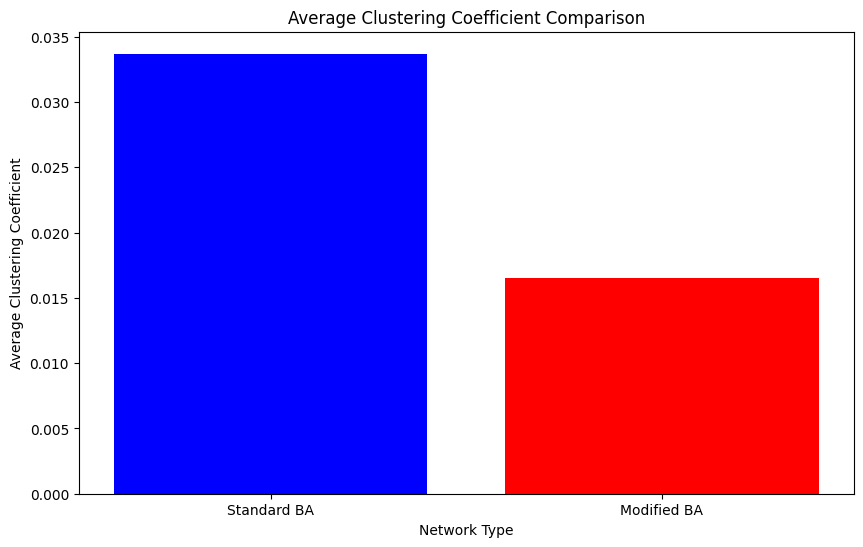

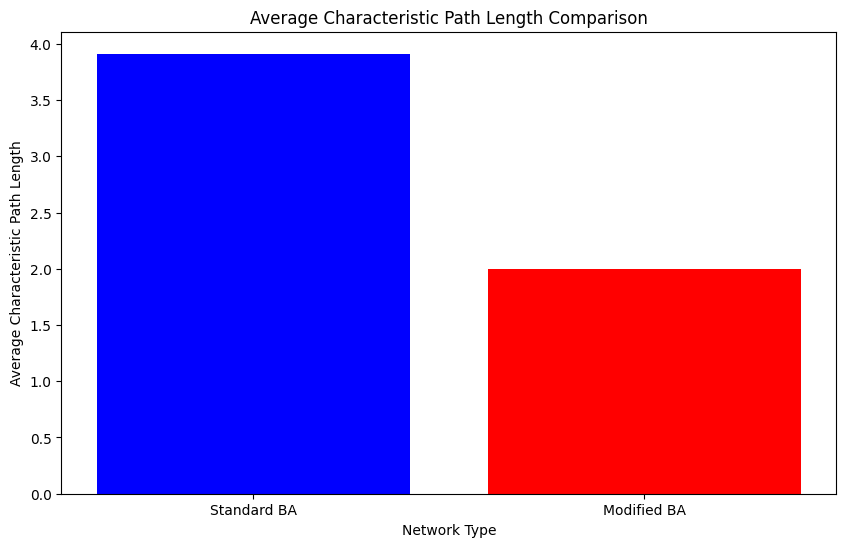

In [28]:
# Plot clustering coefficient
plt.figure(figsize=(10, 6))
plt.bar(['Standard BA', 'Modified BA'], [std_clustering_coeff, mod_clustering_coeff], color=['blue', 'red'])
plt.xlabel('Network Type')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient Comparison')
plt.show()

# Plot characteristic path length
plt.figure(figsize=(10, 6))
plt.bar(['Standard BA', 'Modified BA'], [std_path_length, mod_path_length], color=['blue', 'red'])
plt.xlabel('Network Type')
plt.ylabel('Average Characteristic Path Length')
plt.title('Average Characteristic Path Length Comparison')
plt.show()

# Plot Degree Distribution in Log-Log Scale

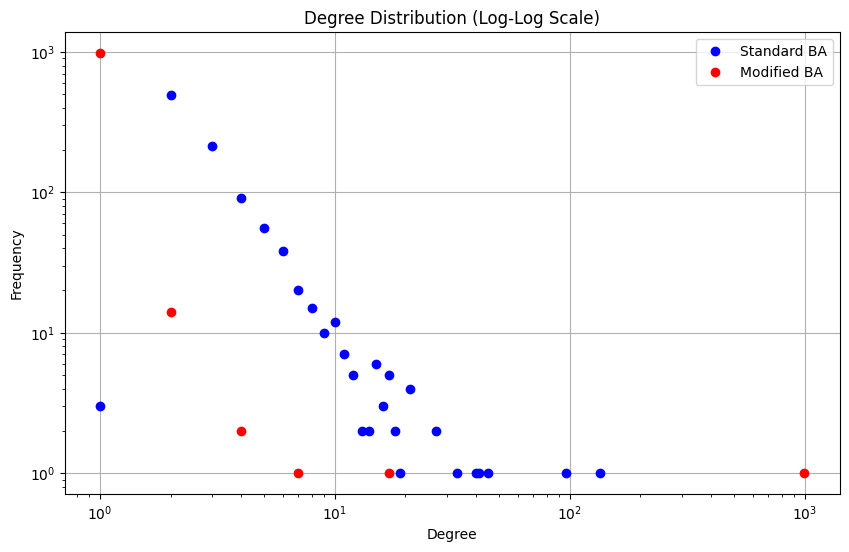

In [25]:
# Plot degree distribution in log-log scale for standard BA network
std_degrees = list(std_degree_distribution.keys())
std_counts = list(std_degree_distribution.values())

plt.figure(figsize=(10, 6))
plt.loglog(std_degrees, std_counts, 'bo', label='Standard BA')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True)
plt.legend()

# Plot degree distribution in log-log scale for modified BA network
mod_degrees = list(mod_degree_distribution.keys())
mod_counts = list(mod_degree_distribution.values())

plt.loglog(mod_degrees, mod_counts, 'ro', label='Modified BA')
plt.legend()
plt.show()

# Create Higher-Order Network Variants

Higher-Order Modified BA - Average Clustering Coefficient: 0.012028601579143384
Higher-Order Modified BA - Average Characteristic Path Length: 1.997952


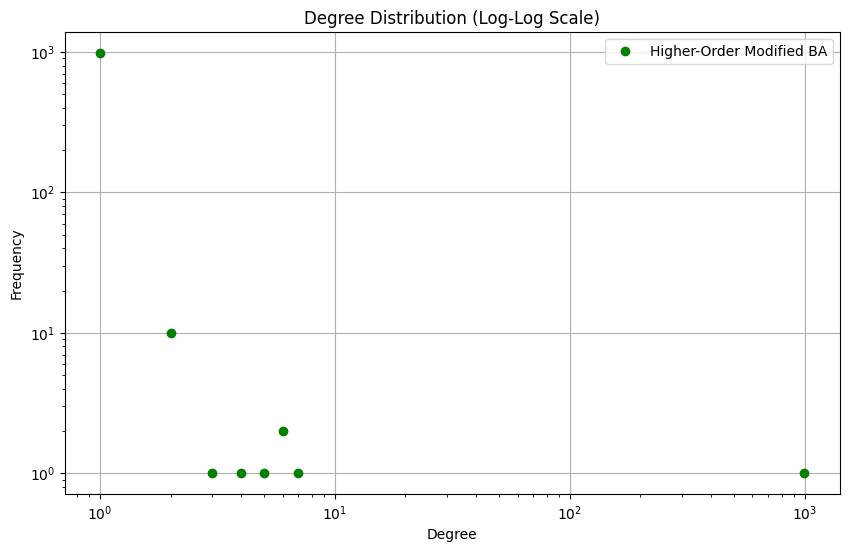

In [26]:
# Higher-order variant: Adding more edges at each step
class HigherOrderBarabasiAlbertGraph(ModifiedBarabasiAlbertGraph):
    def __init__(self, initial_nodes, m, additional_edges):
        super().__init__(initial_nodes, m)
        self.additional_edges = additional_edges

    def add_node(self):
        new_node = self.node_count
        self.graph[new_node] = set()
        targets = self._select_targets()
        for target in targets:
            self.graph[new_node].add(target)
            self.graph[target].add(new_node)
            self.node_list.append(target)
        self.node_list.extend([new_node] * (self.m + self.additional_edges))
        self.node_count += 1

# Example usage for higher-order variant
additional_edges = 3
higher_order_graph = HigherOrderBarabasiAlbertGraph(initial_nodes, m, additional_edges)
higher_order_graph.generate_graph(total_nodes)
higher_order_mod_graph = higher_order_graph.get_graph()

# Compute topological features for higher-order modified BA network
higher_order_clustering_coeff = calculate_clustering_coefficient(higher_order_mod_graph)
higher_order_path_length = calculate_characteristic_path_length(higher_order_mod_graph)
higher_order_degree_distribution = calculate_degree_distribution(higher_order_mod_graph)

print(f"Higher-Order Modified BA - Average Clustering Coefficient: {higher_order_clustering_coeff}")
print(f"Higher-Order Modified BA - Average Characteristic Path Length: {higher_order_path_length}")

# Plot degree distribution in log-log scale for higher-order modified BA network
higher_order_degrees = list(higher_order_degree_distribution.keys())
higher_order_counts = list(higher_order_degree_distribution.values())

plt.figure(figsize=(10, 6))
plt.loglog(higher_order_degrees, higher_order_counts, 'go', label='Higher-Order Modified BA')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True)
plt.legend()
plt.show()